In [59]:
import tensorflow as tf

In [60]:
tf.__version__

'2.19.0'

In [61]:
!pip install matplotlib



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
import matplotlib.pyplot as plt

In [63]:
import os

In [64]:
dataset_dir=r"D:\Tensorflow\archive\data"

In [65]:
dataset=tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    image_size=(128,128),
    batch_size=32,
    label_mode='int',
    validation_split=0.2,
    subset="both",
    seed=42
)

Found 7553 files belonging to 2 classes.
Using 6043 files for training.
Using 1510 files for validation.


In [66]:
train_ds,val_ds=dataset

In [67]:
train_ds=train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

In [68]:
model=tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255,input_shape=(128,128,3)),

    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128,3,activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

d:\Tensorflow\myenv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 95s 475ms/step - accuracy: 0.6977 - loss: 0.5860 - val_accuracy: 0.7762 - val_loss: 0.4904
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 142s 479ms/step - accuracy: 0.7639 - loss: 0.4983 - val_accuracy: 0.7682 - val_loss: 0.4943
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 93s 491ms/step - accuracy: 0.7810 - loss: 0.4835 - val_accuracy: 0.7960 - val_loss: 0.4503
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 92s 485ms/step - accuracy: 0.7942 - loss: 0.4644 - val_accuracy: 0.8126 - val_loss: 0.4182
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 94s 496ms/step - accuracy: 0.8330 - loss: 0.3998 - val_accuracy: 0.8808 - val_loss: 0.3166
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 94s 496ms/step - accuracy: 0.8697 - loss: 0.3361 - val_accuracy: 0.8927 - val_loss: 0.2849
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 93s 494ms/step - accuracy: 0.8789 - loss: 0.3089 - val_accuracy: 0.9007 - val_loss: 0.2568
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 95s 499ms/step - accuracy: 0.8938 - loss: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


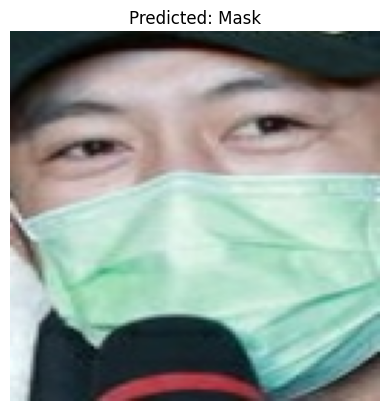

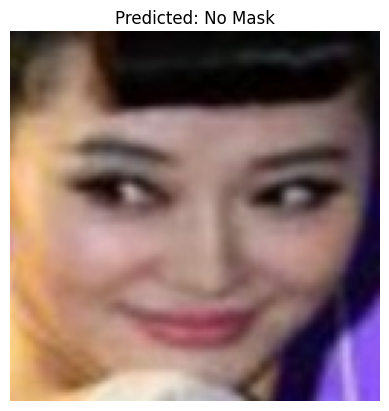

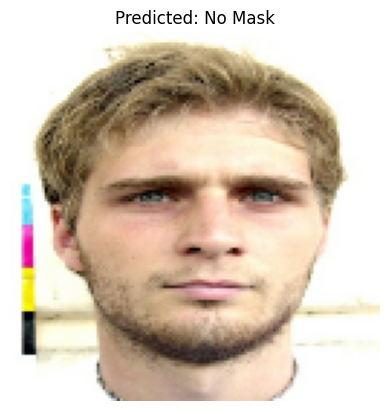

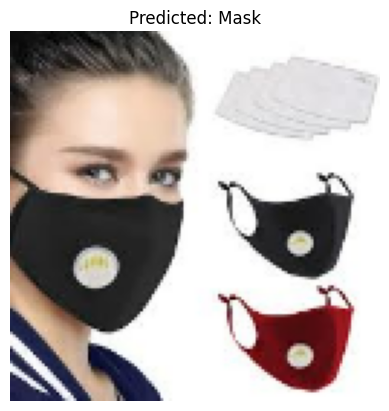

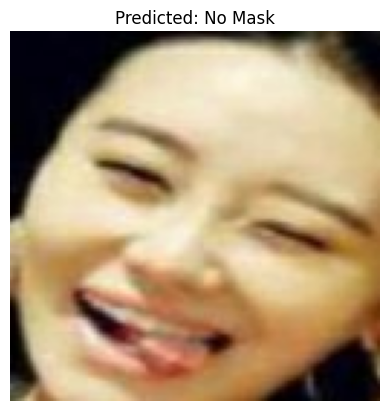

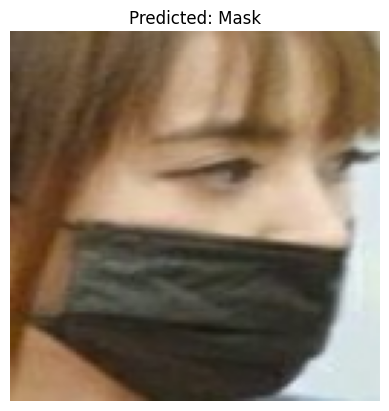

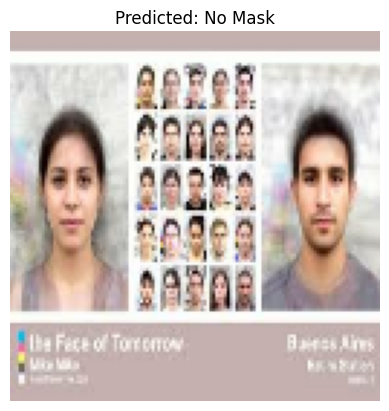

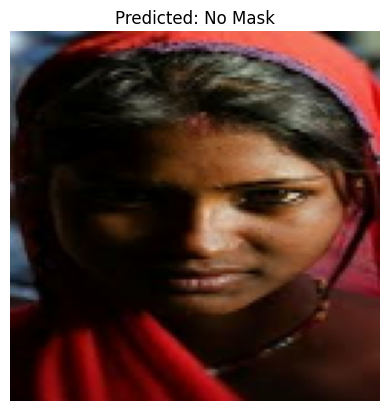

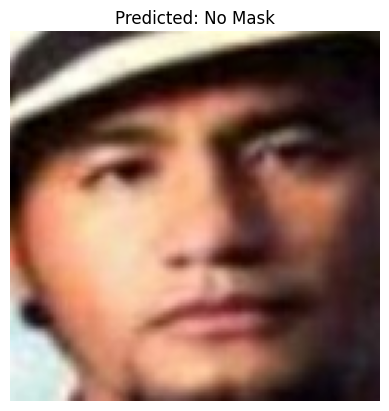

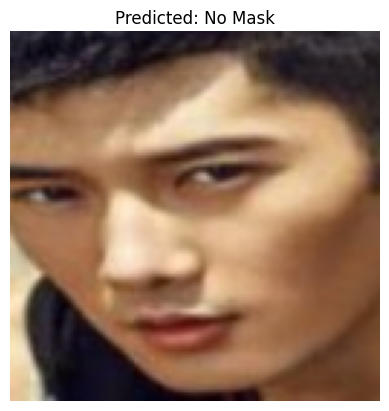

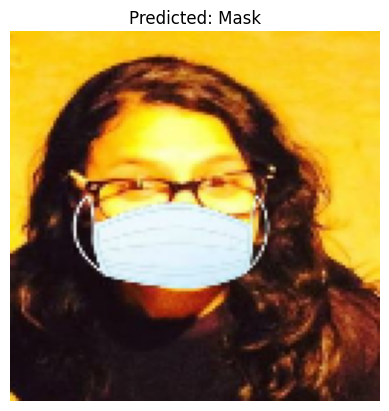

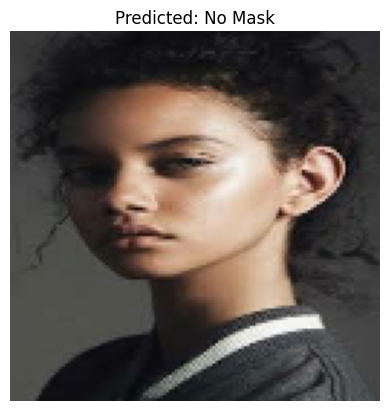

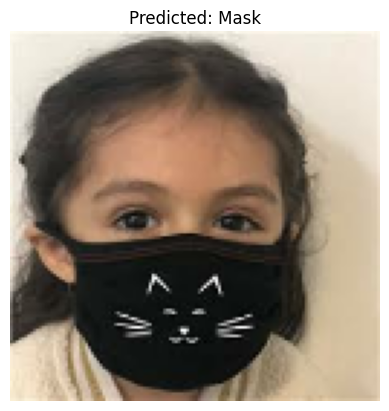

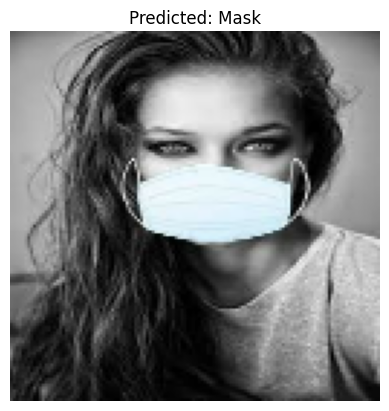

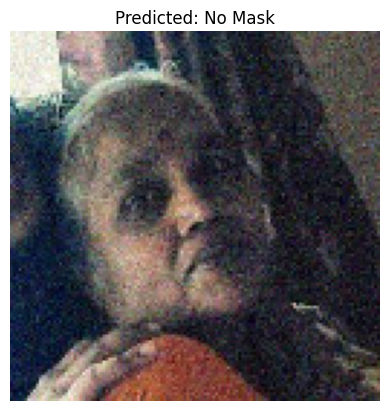

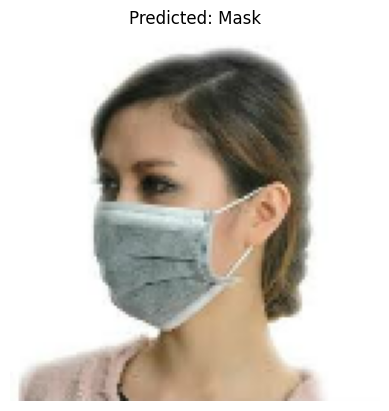

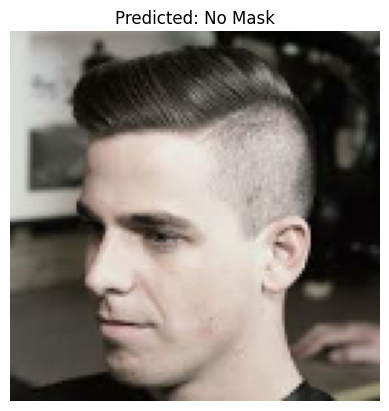

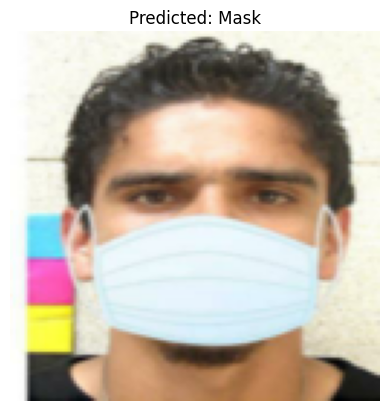

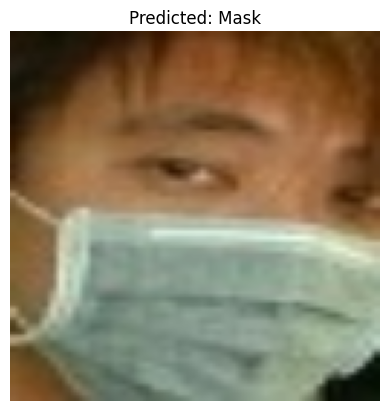

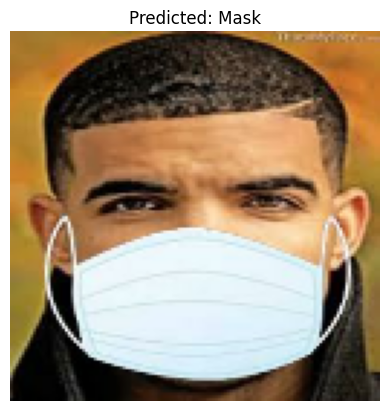

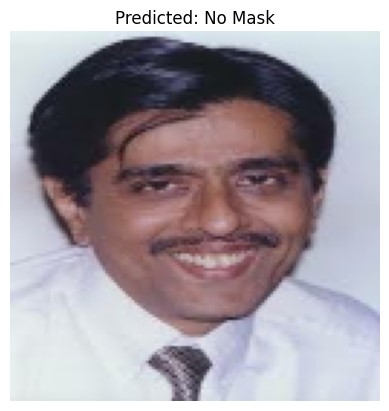

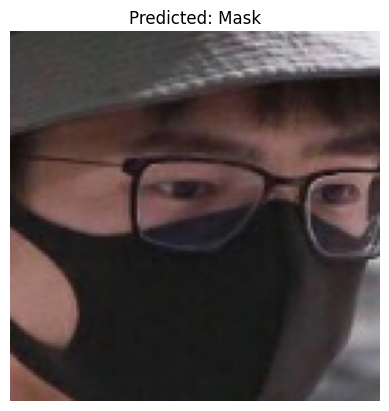

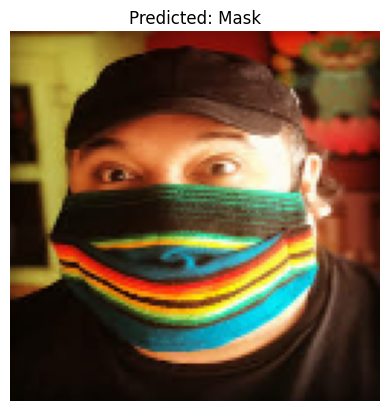

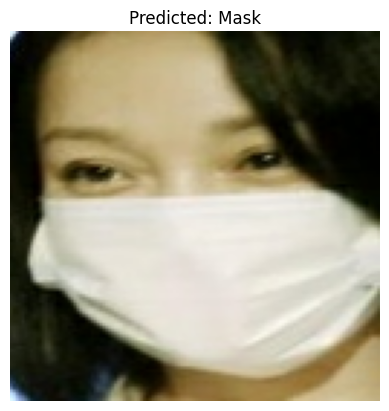

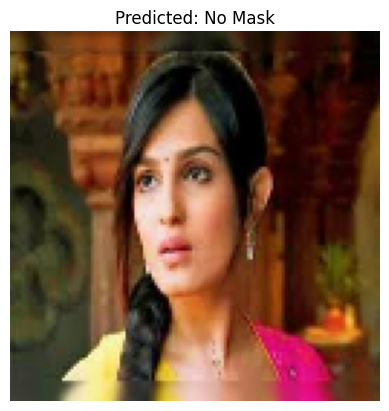

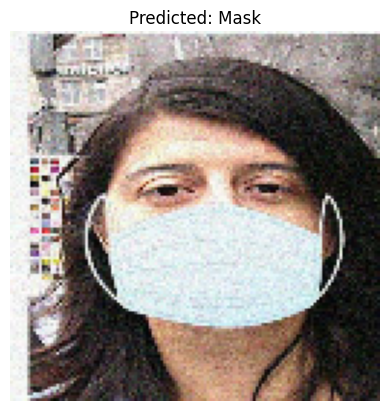

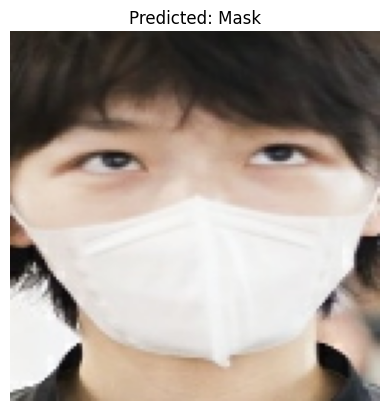

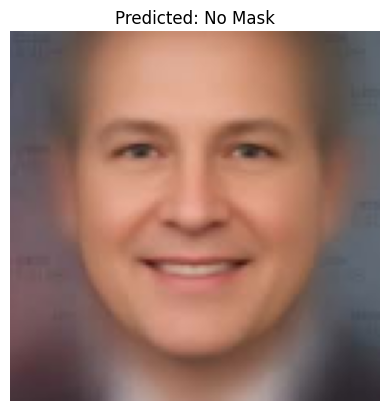

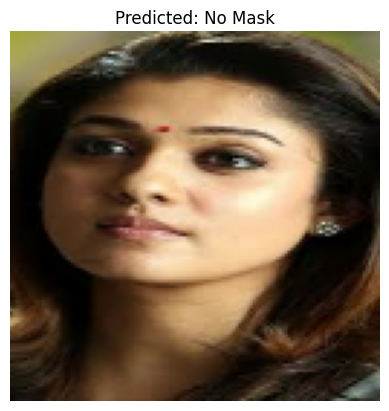

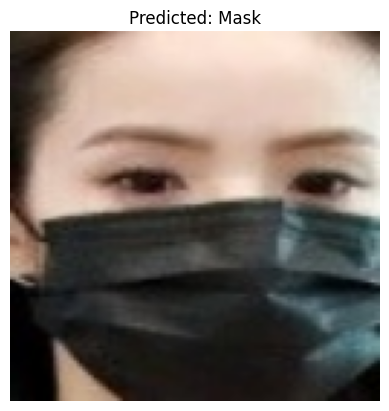

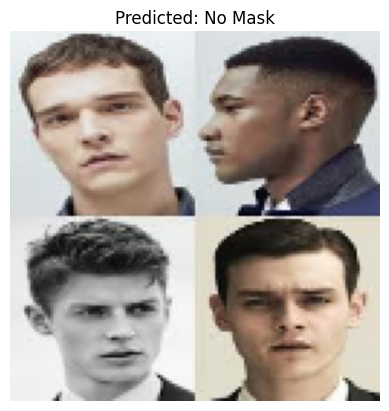

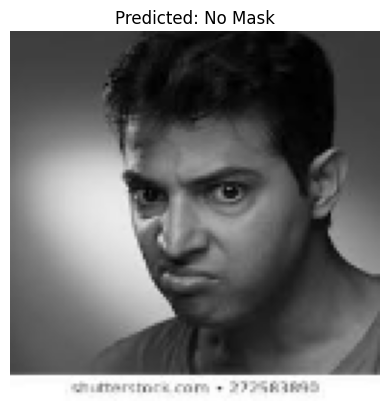

In [70]:
for images,labels in val_ds.take(1):
    preds=model.predict(images)

    for i in range(len(images)):
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Predicted: {'Mask' if preds[i] < 0.5 else 'No Mask'}")
        plt.axis('off')
        plt.show()
    break